<a href="https://colab.research.google.com/github/dakshdedha0001/price_prediction/blob/main/price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-5-8a3c4fafa0be>:12: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  onion_df["Arrival_Date"] = pd.to_datetime(onion_df["Arrival_Date"], errors="coerce")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


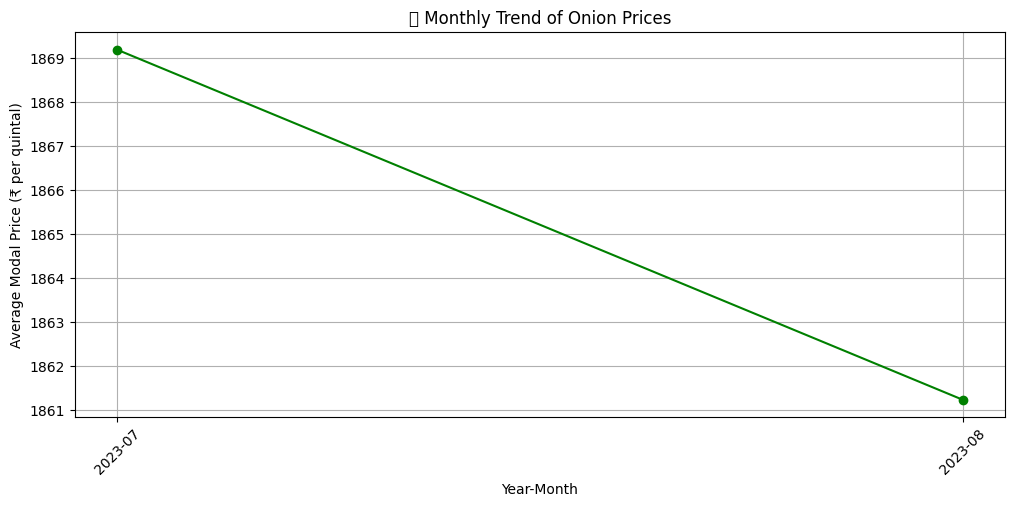

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# ✅ 1. Load Dataset
file_path = "Price_Agriculture_commodities_Week.csv"  # Apna file path ensure karo
df = pd.read_csv(file_path)

# ✅ 2. Filter Only Onion Data
onion_df = df[df["Commodity"].str.lower().str.strip() == "onion"].copy()

# ✅ 3. Convert Arrival_Date to Datetime Format
onion_df["Arrival_Date"] = pd.to_datetime(onion_df["Arrival_Date"], errors="coerce")

# ✅ 4. Check for Missing Values
onion_df.dropna(subset=["Arrival_Date", "Modal Price"], inplace=True)

# ✅ 5. Extract Year-Month for Seasonality Analysis
onion_df["Year-Month"] = onion_df["Arrival_Date"].dt.to_period("M")

# ✅ 6. Group by Year-Month and Calculate Average Modal Price
monthly_trend = onion_df.groupby("Year-Month")["Modal Price"].mean()

# ✅ 7. Plot Monthly Trend of Onion Prices
plt.figure(figsize=(12, 5))
plt.plot(monthly_trend.index.astype(str), monthly_trend.values, marker="o", linestyle="-", color="green")
plt.xticks(rotation=45)
plt.xlabel("Year-Month")
plt.ylabel("Average Modal Price (₹ per quintal)")
plt.title("📈 Monthly Trend of Onion Prices")
plt.grid(True)
plt.show()

plt.show()

<ipython-input-6-6d862608a8b5>:12: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  onion_df["Arrival_Date"] = pd.to_datetime(onion_df["Arrival_Date"], errors="coerce")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


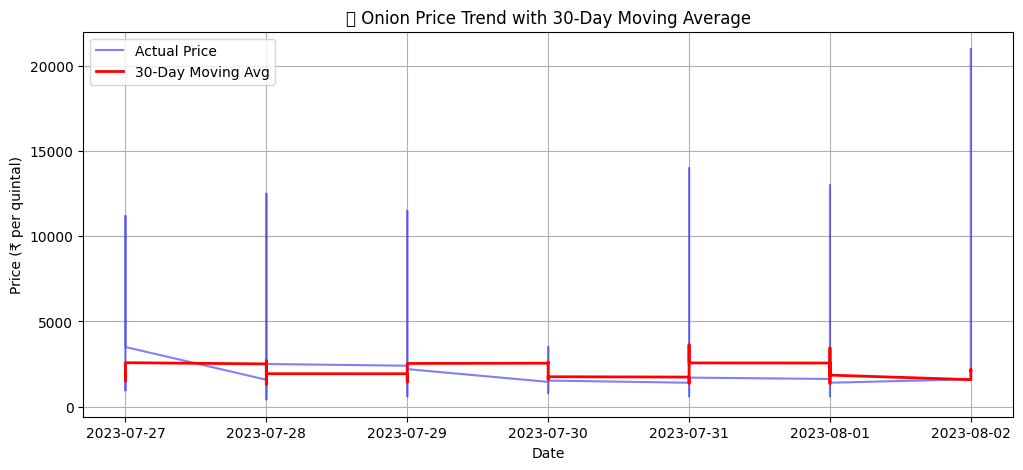

<Figure size 1200x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


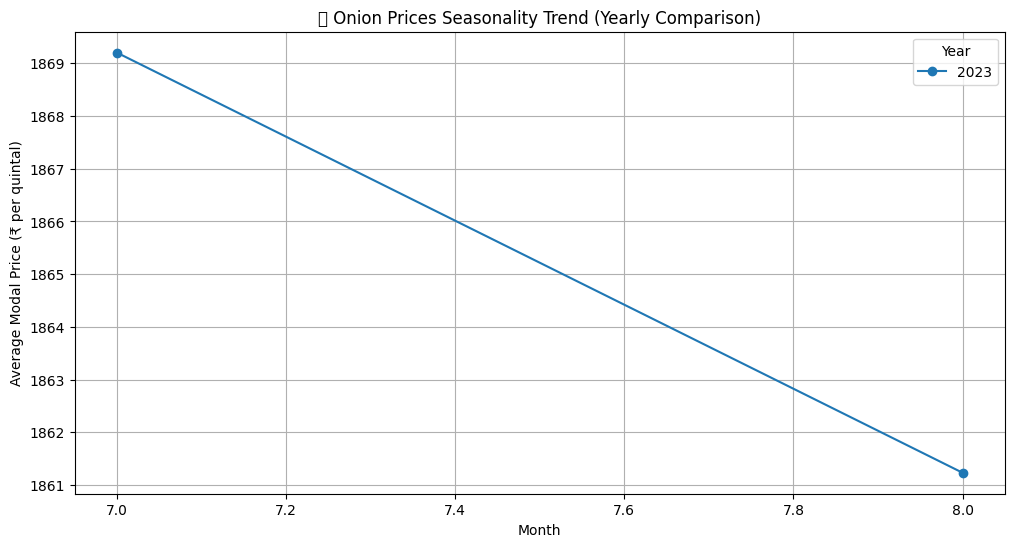

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# ✅ Load Dataset
file_path = "Price_Agriculture_commodities_Week.csv"
df = pd.read_csv(file_path)

# ✅ Filter Only Onion Data
onion_df = df[df["Commodity"].str.lower().str.strip() == "onion"].copy()

# ✅ Convert Arrival_Date to Datetime Format
onion_df["Arrival_Date"] = pd.to_datetime(onion_df["Arrival_Date"], errors="coerce")

# ✅ Drop Missing Values
onion_df.dropna(subset=["Arrival_Date", "Modal Price"], inplace=True)

# ✅ Sort Data by Date
onion_df = onion_df.sort_values(by="Arrival_Date")

# ✅ Calculate Moving Average (Rolling Mean - 30 days)
onion_df["Moving_Avg"] = onion_df["Modal Price"].rolling(window=30, min_periods=1).mean()

# ✅ Plot Original vs Moving Average Price Trend
plt.figure(figsize=(12, 5))
plt.plot(onion_df["Arrival_Date"], onion_df["Modal Price"], label="Actual Price", color="blue", alpha=0.5)
plt.plot(onion_df["Arrival_Date"], onion_df["Moving_Avg"], label="30-Day Moving Avg", color="red", linewidth=2)
plt.xlabel("Date")
plt.ylabel("Price (₹ per quintal)")
plt.title("📈 Onion Price Trend with 30-Day Moving Average")
plt.legend()
plt.grid(True)
plt.show()

# ✅ Seasonality Analysis (Monthly Price Trends Yearly)
onion_df["Year"] = onion_df["Arrival_Date"].dt.year
onion_df["Month"] = onion_df["Arrival_Date"].dt.month

# ✅ Group by Year-Month and Calculate Mean Price
seasonality_df = onion_df.groupby(["Year", "Month"])["Modal Price"].mean().unstack(level=0)

# ✅ Plot Seasonality Trend (Monthly Trends Over Years)
plt.figure(figsize=(12, 6))
seasonality_df.plot(kind="line", figsize=(12, 6), marker="o", colormap="tab10")
plt.xlabel("Month")
plt.ylabel("Average Modal Price (₹ per quintal)")
plt.title("📊 Onion Prices Seasonality Trend (Yearly Comparison)")
plt.legend(title="Year")
plt.grid(True)
plt.show()


In [7]:
import pandas as pd
import numpy as np

# ✅ Load Dataset
file_path = "Price_Agriculture_commodities_Week.csv"
df = pd.read_csv(file_path)

# ✅ Filter Only Onion Data
onion_df = df[df["Commodity"].str.lower().str.strip() == "onion"].copy()

# ✅ Convert Date Column to Datetime
onion_df["Arrival_Date"] = pd.to_datetime(onion_df["Arrival_Date"], errors="coerce")

# ✅ Drop Missing Values
onion_df.dropna(subset=["Arrival_Date", "Modal Price"], inplace=True)

# ✅ Sort by Date
onion_df = onion_df.sort_values(by="Arrival_Date")

# ✅ Extract New Features from Date
onion_df["Year"] = onion_df["Arrival_Date"].dt.year
onion_df["Month"] = onion_df["Arrival_Date"].dt.month
onion_df["Day"] = onion_df["Arrival_Date"].dt.day
onion_df["Weekday"] = onion_df["Arrival_Date"].dt.weekday  # 0 = Monday, 6 = Sunday

# ✅ Create Lag Features (Past Price as Input)
onion_df["Price_Lag_1"] = onion_df["Modal Price"].shift(1)  # Previous day price
onion_df["Price_Lag_7"] = onion_df["Modal Price"].shift(7)  # 1-week ago price
onion_df["Price_Lag_30"] = onion_df["Modal Price"].shift(30)  # 1-month ago price

# ✅ Create Rolling Average Features
onion_df["Rolling_Avg_7"] = onion_df["Modal Price"].rolling(window=7, min_periods=1).mean()
onion_df["Rolling_Avg_30"] = onion_df["Modal Price"].rolling(window=30, min_periods=1).mean()

# ✅ Drop NA Values After Creating Lag Features
onion_df.dropna(inplace=True)

# ✅ Final Preprocessed Data Check
print(onion_df.head())

# ✅ Save Cleaned Data for Model Training
onion_df.to_csv("onion_price_preprocessed.csv", index=False)


              State      District          Market Commodity Variety Grade  \
4314  Uttar Pradesh         Gonda       Nawabganj     Onion     Red   FAQ   
4321  Uttar Pradesh     Gorakhpur        Sehjanwa     Onion     Red   FAQ   
4324  Uttar Pradesh      Hamirpur  Bharuasumerpur     Onion     Red   FAQ   
3976  Uttar Pradesh  Bulandshahar          Khurja     Onion     Red   FAQ   
4342  Uttar Pradesh        Hardoi         Sandila     Onion     Red   FAQ   

     Arrival_Date  Min Price  Max Price  Modal Price  Year  Month  Day  \
4314   2023-07-28     1550.0     1625.0       1600.0  2023      7   28   
4321   2023-07-28     1475.0     1490.0       1480.0  2023      7   28   
4324   2023-07-28     1400.0     1510.0       1480.0  2023      7   28   
3976   2023-07-28     1530.0     1630.0       1580.0  2023      7   28   
4342   2023-07-28     1540.0     1620.0       1580.0  2023      7   28   

      Weekday  Price_Lag_1  Price_Lag_7  Price_Lag_30  Rolling_Avg_7  \
4314        4       

<ipython-input-7-b66adeb5bd35>:12: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  onion_df["Arrival_Date"] = pd.to_datetime(onion_df["Arrival_Date"], errors="coerce")


In [8]:
print("Total rows in onion dataset:", len(onion_df))

Total rows in onion dataset: 1104


In [9]:
from sklearn.model_selection import train_test_split

# ✅ Select Features and Target
features = ["Year", "Month", "Day", "Weekday", "Price_Lag_1", "Price_Lag_7", "Price_Lag_30", "Rolling_Avg_7", "Rolling_Avg_30"]
target = "Modal Price"

# ✅ Prepare Input (X) and Output (Y)
X = onion_df[features]
y = onion_df[target]

# ✅ Split Data into Training (80%) & Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

# ✅ Check Shape of Train/Test Data
print("Training Data Shape:", X_train.shape, y_train.shape)
print("Testing Data Shape:", X_test.shape, y_test.shape)


Training Data Shape: (883, 9) (883,)
Testing Data Shape: (221, 9) (221,)


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ✅ Initialize Model
xtslm_model = LinearRegression()

# ✅ Train Model
xtslm_model.fit(X_train, y_train)

# ✅ Predict on Test Data
y_pred_xtslm = xtslm_model.predict(X_test)

# ✅ Evaluate Performance
rmse_xtslm = np.sqrt(mean_squared_error(y_test, y_pred_xtslm))
r2_xtslm = r2_score(y_test, y_pred_xtslm)

print(f"📊 XTSLM Model - RMSE: {rmse_xtslm:.2f}, R² Score: {r2_xtslm:.2f}")



📊 XTSLM Model - RMSE: 1636.81, R² Score: 0.29


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import numpy as np

# ✅ Reshape Data for LSTM (3D format: samples, timesteps, features)
X_train_lstm = np.expand_dims(X_train.values, axis=1)
X_test_lstm = np.expand_dims(X_test.values, axis=1)

# ✅ Build ULNN Model (LSTM)
ulnn_model = Sequential([
    LSTM(50, activation="relu", return_sequences=True, input_shape=(1, X_train.shape[1])),
    Dropout(0.2),
    LSTM(50, activation="relu"),
    Dropout(0.2),
    Dense(1)
])

# ✅ Compile Model
ulnn_model.compile(optimizer="adam", loss="mse")

# ✅ Train Model
ulnn_model.fit(X_train_lstm, y_train, epochs=20, batch_size=16, validation_data=(X_test_lstm, y_test))

# ✅ Predict on Test Data
y_pred_ulnn = ulnn_model.predict(X_test_lstm).flatten()

# ✅ Evaluate Performance
rmse_ulnn = np.sqrt(mean_squared_error(y_test, y_pred_ulnn))
r2_ulnn = r2_score(y_test, y_pred_ulnn)

print(f"📊 ULNN Model - RMSE: {rmse_ulnn:.2f}, R² Score: {r2_ulnn:.2f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 4532819.0000 - val_loss: 7027443.5000
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3164293.2500 - val_loss: 3807739.2500
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1937065.8750 - val_loss: 3658105.0000
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1882361.5000 - val_loss: 3677258.2500
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1381444.2500 - val_loss: 3551670.7500
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1265742.8750 - val_loss: 3523709.7500
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1619482.6250 - val_loss: 3562010.0000
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1292980.5000 - val_loss: 3571072.0000
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1163333.8750 - val_loss: 3620094.5000
Epoch 10/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1155000.6250 - val_loss: 3481393.2500
Epoch 11/20
56/56 ━━━━━━━━━━━━━━━━━━━━

In [13]:
!pip install streamlit
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.6 MB/s eta 0:00:00


In [18]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# 🎯 Title of the App
st.title("🔥 Onion Price Prediction using AI-ML")

# 📂 Upload Dataset
uploaded_file = st.file_uploader("Upload CSV file", type=["csv"])

if uploaded_file is not None:
    df = pd.read_csv(uploaded_file)
    st.write("📊 **Dataset Preview:**")
    st.write(df.head())

    # ✅ Select Features & Target
    feature_col = st.selectbox("Select Feature Column", df.columns)
    target_col = st.selectbox("Select Target Column", df.columns)

    # ✅ Train Model
    if st.button("Train Model"):
        X = df[[feature_col]]
        y = df[target_col]

        model = LinearRegression()
        model.fit(X, y)
        predictions = model.predict(X)

        st.write("✅ **Model Trained Successfully!**")
        st.write(f"📉 Predicted Prices: {predictions[:5]}")

        # 📈 Show Predictions
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots()
        ax.plot(y.values, label="Actual Price", color="blue")
        ax.plot(predictions, label="Predicted Price", color="red")
        ax.set_xlabel("Days")
        ax.set_ylabel("Onion Price (₹)")
        ax.legend()
        st.pyplot(fig)

# ✅ Take User Input for Prediction
st.write("🔮 **Predict Future Price**")
input_value = st.number_input("Enter Feature Value:", value=0.0)
if st.button("Predict"):
    future_price = model.predict([[input_value]])
    st.write(f"📢 **Predicted Onion Price: ₹{future_price[0]:.2f}**")


Overwriting app.py


In [21]:
!ngrok authtoken 2vEHE3qruwuRxvMn2lRfvoCNScl_4yBPJtJQUn4UxnsqqFiKN


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [24]:
!npm install -g localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴
added 22 packages in 4s
⠴
⠴3 packages are looking for funding
⠴  run `npm fund` for details
⠴

In [25]:
!streamlit run app.py &>/dev/null &

In [26]:
!lt --port 8501

your url is: https://tiny-mice-cross.loca.lt
^C


In [27]:
!lt --port 8501

your url is: https://fine-poets-walk.loca.lt
^C


In [29]:
!lt --port 8501

your url is: https://swift-walls-own.loca.lt
^C
